# 球面集中現象
次元が大きくなると，すべてのサンプルは超球の表面に集まる。適当なサンプルを原点とみなしても同じ現象が生じる。すなわち，どのサンプルもほとんどが同じ距離にみえる。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

任意次元中に作成した標準正規分布内のデータに対し，データ同士の距離の分布を確認する

In [10]:
def make_figures(n_dimension=2, n_samples=1000):
    
    #任意次元の標準正規分布の生成
    mean = np.zeros(n_dimension)   #平均0
    cov = np.identity(n_dimension) #対角正方行列（分散１）
    x = np.random.multivariate_normal(mean,cov,size=n_samples)

    r = np.sqrt(np.sum(np.square(x),axis=1))#原点からの距離を計算
    
    #原点からの分布を確認するためのベクトルを適当に作成
    theta = np.random.uniform(-np.pi,np.pi,n_samples)
    
    #距離のヒストグラム 高次になると同じ値に集まる
    plt.hist(r, bins=20)
    plt.xlim([0,50])
    plt.title("distance histgram, dimension ="+str(n_dimension))
    plt.show()

    #2次元上にデータの分布を描く
    p1 = r * np.cos(theta)
    p2 = r * np.sin(theta)
    plt.scatter(p1,p2,marker=".")
    plt.xlim([-30,30])
    plt.ylim([-30,30])
    plt.title("disribution, dimension ="+str(n_dimension))
    plt.show()
  

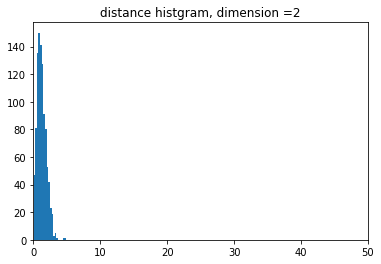

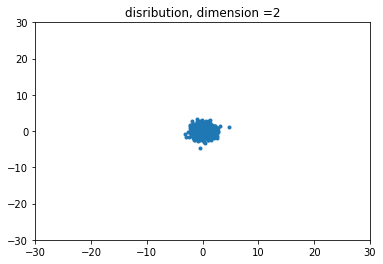

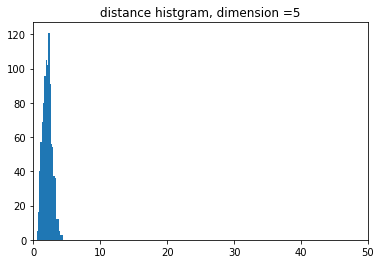

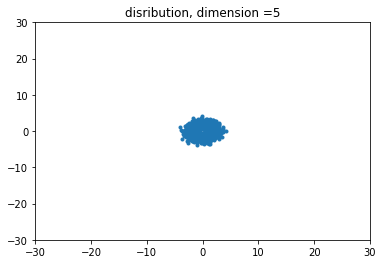

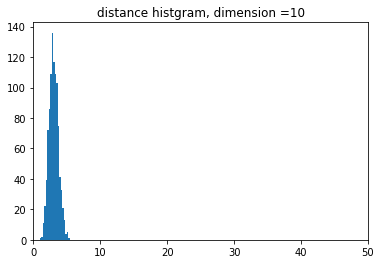

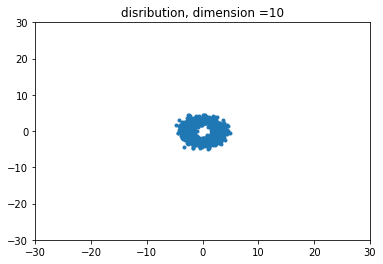

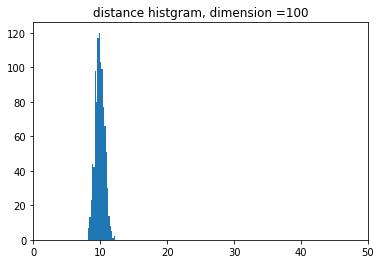

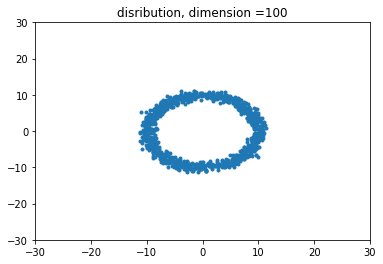

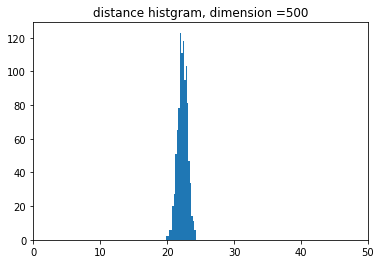

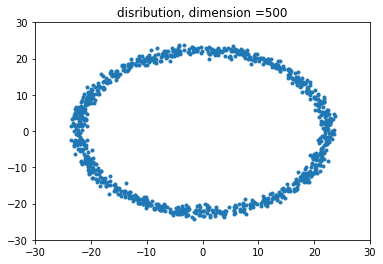

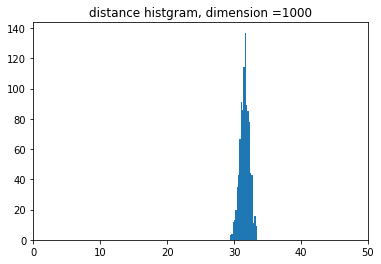

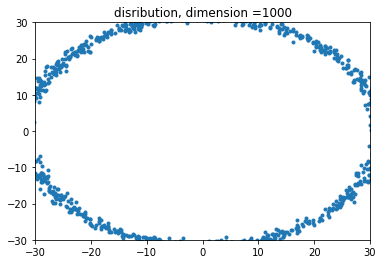

In [11]:
seed = 100
np.random.seed(seed)

list_n_dimension = [2,5, 10, 100, 500,1000]
for n_dimension in list_n_dimension:
    make_figures(n_dimension, 1000)